In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
stations=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A 
        date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    info=session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2014-01-01','2014-12-31'))

[(56.0, 73.26453600308048, 85.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2014-01-01','2014-12-31'))

[(56.0, 73.26453600308048, 85.0)]


In [11]:
newinfo=[72.0,79.25,83.0]
tmin=min(newinfo)
tmax=max(newinfo)


In [12]:
# Plot the results from your previous query as a bar chart. 
df12=pd.DataFrame(newinfo,index=['tmin','tavg','tmax'])
df12

,0
tmin,72.00
tavg,79.25
tmax,83.00


In [13]:
average= df12.loc['tavg',:][0]
average

79.25

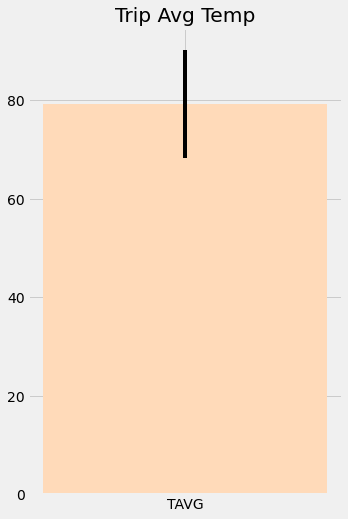

In [14]:
plt.figure(figsize=(5, 8))
plt.bar('TAVG',average,yerr=tmax-tmin, color='peachpuff')
plt.title('Trip Avg Temp')
plt.show()
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

### Daily Rainfall Average

In [15]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
sel=[Measurement.station,func.sum(Measurement.prcp), stations.latitude,stations.longitude, stations.elevation]
session.query(*sel).filter(Measurement.date>='2016-08-23')\
.group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


C:\Users\ym881\AppData\Local\Temp\ipykernel_63284\4198773577.py:4: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  session.query(*sel).filter(Measurement.date>='2016-08-23')\


[('USC00516128', 1330.2899999999968, 21.2716, -157.8168, 3.0),
 ('USC00519281', 630.2699999999984, 21.2716, -157.8168, 3.0),
 ('USC00513117', 436.5899999999951, 21.2716, -157.8168, 3.0),
 ('USC00519523', 342.0899999999993, 21.2716, -157.8168, 3.0),
 ('USC00514830', 299.15999999999997, 21.2716, -157.8168, 3.0),
 ('USC00519397', 144.81000000000117, 21.2716, -157.8168, 3.0),
 ('USC00517948', 41.30999999999996, 21.2716, -157.8168, 3.0)]

### Daily Temperature Normals

In [16]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [17]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

In [18]:
# Use the start and end date to create a range of dates
date_range=[]
for x in range(1,8):
    date_range.append(f'2017-08-0{x}')

In [19]:
# Strip off the year and save a list of strings in the format %m-%d
reduced_date_range=[]
for x in range(0,7):
    reduced_date_range.append(date_range[x][5:])
    
reduced_date_range

['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']

In [20]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals=[]
reduced_date_range

for item in reduced_date_range:
    normals.append(daily_normals(item))
normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [21]:
#removed the tuple parenthesis to create dataframe

new_normal=[[67.0, 75.54, 83.0],
[68.0, 75.60377358490567, 84.0],
[70.0, 76.61111111111111, 85.0],
[69.0, 76.71153846153847, 84.0],
[69.0, 76.14814814814815, 82.0],
[67.0, 76.25, 83.0],
[71.0, 77.15686274509804, 83.0]]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df=pd.DataFrame(new_normal, index=reduced_date_range, columns=['tmin','tavg','tmax'])
df

,tmin,tavg,tmax
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


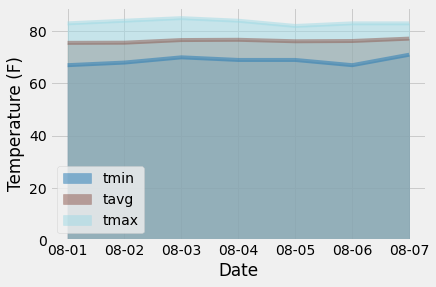

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot.area(stacked=False,colormap='tab20')
plt.ylabel('Temperature (F)')
plt.xlabel("Date")
plt.show()

## Close Session

In [24]:
session.close()